In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
# Load your dataset from Google Drive
file_path = '/content/drive/MyDrive/Deep Learning Project 02/NVDA.csv'
df = pd.read_csv(file_path)




In [8]:


# Assuming your dataset has a column 'Date' and 'Close' representing stock prices
# You may need to preprocess your data accordingly

# Convert 'Date' to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df[['Close']])


In [9]:
# Function to create sequences for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequence = data[i : (i + sequence_length)]
        sequences.append(sequence)
    return np.array(sequences)

# Set sequence length (adjust as needed)
sequence_length = 10

# Create sequences for LSTM
sequences = create_sequences(df_scaled, sequence_length)


In [10]:
# Split data into features (X) and target variable (y)
X = sequences[:, :-1]
y = sequences[:, -1]


In [11]:
# Split data into training and testing sets (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [13]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
6/6 [==============================] - 4s 10ms/step - loss: 0.1310
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0211
Epoch 3/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0189
Epoch 4/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 5/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 6/10
6/6 [==============================] - 0s 10ms/step - loss: 0.0063
Epoch 7/10
6/6 [==============================] - 0s 11ms/step - loss: 0.0040
Epoch 8/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0039
Epoch 9/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 10/10
6/6 [==============================] - 0s 13ms/step - loss: 0.0024


In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)


2/2 [==============================] - 1s 7ms/step


In [15]:
# Inverse transform the predictions and actual values to original scale
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 28.299662581269867


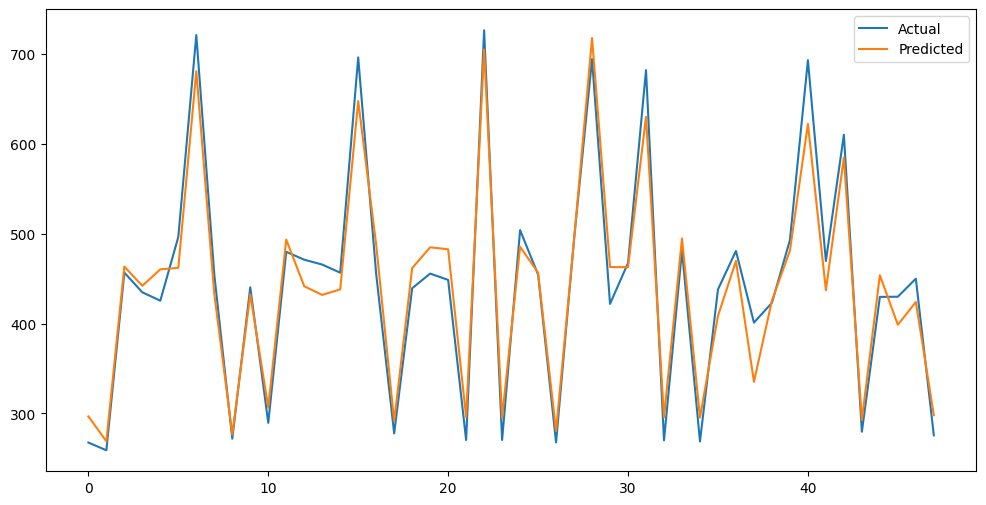

In [16]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred_actual, label='Predicted')
plt.legend()
plt.show()
